# Challenge

## WADE El Hadji Malick

In [1]:
from time import time
import numpy as np
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt    
import seaborn as sns
import math
from random import *

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, LeaveOneOut

from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import auc, log_loss, recall_score, precision_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef, accuracy_score, roc_auc_score,roc_curve

import sklearn.metrics
from sklearn.metrics import classification_report

import warnings

# On ignore les avertissements des classes de modéles
warnings.filterwarnings("ignore", category=DeprecationWarning)

# On sauvegarde nos modéles finales
from sklearn.externals import joblib # save and load models

# # save the model to disk
# filename = 'modeles/SVM'
# joblib.dump(SVM, filename)

# # load the model from disk
# loaded_model = joblib.load(filename)

## 1. Chargement des données

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

path_Home = "/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/data_challenge"
#path = "/home/malick/Bureau/projet_Stats/Projets/Statistique_en_grande_dimension/data_challenge"

Xtrainchallenge = pd.read_csv(path_Home + "/Xtrainchallenge.txt",  sep=' ')
Ytrainchallenge = pd.read_csv(path_Home + "/Ytrainchallenge.txt",  sep=' ')

Xtestchallenge = pd.read_csv(path_Home + "/Xtestchallenge.txt",  sep=' ')

In [3]:
print("Données Train:")
print ("Lignes: " ,Xtrainchallenge.shape[0])
print ("Colonnes: " ,Xtrainchallenge.shape[1])
print("----")
print("Données Test:")
print ("Lignes: " ,Xtestchallenge.shape[0])
print ("Colonnes: " ,Xtestchallenge.shape[1])

Données Train:
Lignes:  1000
Colonnes:  500
----
Données Test:
Lignes:  1000
Colonnes:  500


In [4]:
Xtrainchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1,485,477,537,479,452,471,491,476,475,473,455,500,456,507,478,491,447,422,480,482,515,482,464,484,477,496,509,491,459,482,483,505,508,458,509,517,479,487,473,472,474,531,485,508,517,489,507,515,440,465,550,532,450,483,460,469,507,485,479,458,516,480,460,479,648,480,561,481,474,474,544,484,490,451,494,480,486,459,521,500,466,457,494,492,488,497,477,461,473,464,476,471,481,507,474,500,481,536,464,501,479,480,483,462,470,181,510,470,431,482,496,481,469,539,491,482,481,476,533,495,474,485,479,495,465,541,493,488,452,481,491,501,477,479,503,529,540,504,482,463,477,530,508,488,488,474,479,506,478,511,501,474,483,575,478,482,461,480,543,415,527,477,487,486,511,474,477,482,476,516,466,492,561,479,472,457,497,475,452,491,477,454,461,472,481,490,526,490,459,478,461,516,511,544,519,487,485,475,477,476,478,470,493,581,484,476,521,474,492,459,487,504,464,485,478,465,603,475,481,491,555,424,528,511,384,525,459,478,477,539,479,508,471,517,482,518,473,478,506,476,507,434,466,480,547,518,516,476,492,454,463,497,477,531,472,495,532,496,492,480,480,479,517,470,470,500,468,477,486,553,490,499,450,469,466,479,476,401,491,551,477,517,492,475,537,516,472,451,484,471,469,523,496,482,458,487,477,457,458,493,458,517,478,482,474,517,482,488,490,485,440,455,464,531,483,467,494,488,414,491,494,497,501,476,481,485,478,476,491,492,523,492,476,464,496,473,658,507,628,484,468,448,502,618,438,486,496,535,452,497,490,485,504,477,481,473,517,476,479,483,482,458,464,466,473,482,497,479,497,495,489,483,500,490,479,471,468,496,419,513,475,471,514,479,480,486,480,477,494,454,480,539,477,441,482,461,484,510,475,485,480,4

In [5]:
Xtestchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1001,482,538,473,485,576,479,489,477,473,479,495,527,439,485,465,523,477,466,502,478,479,466,484,481,492,465,478,481,469,488,472,551,521,536,472,510,499,513,475,476,476,476,507,493,523,446,492,513,498,452,601,482,476,478,524,473,461,501,588,466,487,487,491,483,453,544,504,477,484,477,520,494,492,475,476,522,474,471,461,487,511,524,409,467,510,517,474,478,483,561,476,460,457,527,483,543,484,449,484,498,466,478,482,477,480,462,473,558,535,485,490,491,482,473,530,493,463,489,488,473,477,484,486,505,437,497,501,499,476,435,476,490,473,475,427,513,505,475,480,476,496,527,489,479,464,495,477,510,485,512,430,489,465,432,476,498,503,448,481,469,476,480,488,477,485,492,475,482,475,545,478,554,422,479,475,444,501,479,486,497,508,513,478,487,499,474,499,493,489,471,486,494,486,444,525,478,471,484,476,484,519,498,527,555,498,474,473,481,467,478,511,467,470,485,481,501,549,473,532,484,447,539,510,535,522,463,492,477,477,493,490,481,471,485,445,519,502,473,469,489,485,562,458,464,540,482,463,472,475,529,508,499,482,503,477,438,487,423,491,512,485,479,485,443,485,502,447,517,551,504,495,517,510,512,469,499,476,522,468,419,476,439,460,475,537,471,502,544,483,469,478,537,541,474,489,532,507,489,484,483,480,491,475,463,512,477,463,487,510,459,491,478,559,493,462,462,470,471,449,466,483,494,489,489,484,483,465,489,482,538,532,470,476,491,571,487,422,546,526,472,542,469,471,554,507,476,488,563,496,484,477,493,452,494,488,455,495,478,491,514,446,496,495,506,475,461,504,486,482,523,484,462,507,480,506,497,476,522,518,446,475,452,498,479,503,461,537,477,477,440,466,472,478,508,481,507,489,487,519,474,47

In [6]:
# On regroupe les données
Xchallenge = pd.concat([Xtrainchallenge,Xtestchallenge])
Xchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1,485,477,537,479,452,471,491,476,475,473,455,500,456,507,478,491,447,422,480,482,515,482,464,484,477,496,509,491,459,482,483,505,508,458,509,517,479,487,473,472,474,531,485,508,517,489,507,515,440,465,550,532,450,483,460,469,507,485,479,458,516,480,460,479,648,480,561,481,474,474,544,484,490,451,494,480,486,459,521,500,466,457,494,492,488,497,477,461,473,464,476,471,481,507,474,500,481,536,464,501,479,480,483,462,470,181,510,470,431,482,496,481,469,539,491,482,481,476,533,495,474,485,479,495,465,541,493,488,452,481,491,501,477,479,503,529,540,504,482,463,477,530,508,488,488,474,479,506,478,511,501,474,483,575,478,482,461,480,543,415,527,477,487,486,511,474,477,482,476,516,466,492,561,479,472,457,497,475,452,491,477,454,461,472,481,490,526,490,459,478,461,516,511,544,519,487,485,475,477,476,478,470,493,581,484,476,521,474,492,459,487,504,464,485,478,465,603,475,481,491,555,424,528,511,384,525,459,478,477,539,479,508,471,517,482,518,473,478,506,476,507,434,466,480,547,518,516,476,492,454,463,497,477,531,472,495,532,496,492,480,480,479,517,470,470,500,468,477,486,553,490,499,450,469,466,479,476,401,491,551,477,517,492,475,537,516,472,451,484,471,469,523,496,482,458,487,477,457,458,493,458,517,478,482,474,517,482,488,490,485,440,455,464,531,483,467,494,488,414,491,494,497,501,476,481,485,478,476,491,492,523,492,476,464,496,473,658,507,628,484,468,448,502,618,438,486,496,535,452,497,490,485,504,477,481,473,517,476,479,483,482,458,464,466,473,482,497,479,497,495,489,483,500,490,479,471,468,496,419,513,475,471,514,479,480,486,480,477,494,454,480,539,477,441,482,461,484,510,475,485,480,4

In [7]:
print("Données Total:")
print ("Lignes: " ,Xchallenge.shape[0])
print ("Colonnes: " ,Xchallenge.shape[1])

Données Total:
Lignes:  2000
Colonnes:  500


In [8]:
col1 =  choice(Xchallenge.columns) # on choisit une variable au hasard

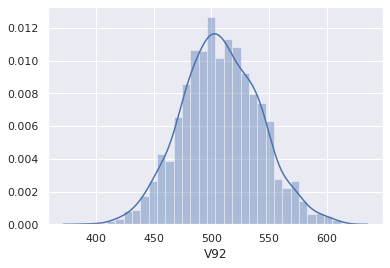

In [9]:
import scipy.stats as stats
import pylab 

sns.set(style="darkgrid")
sns.distplot(Xchallenge[col1])

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([395, 411, 414, ..., 608, 609, 612])),
 (33.7600599926905, 508.1215, 0.9994824749291463))

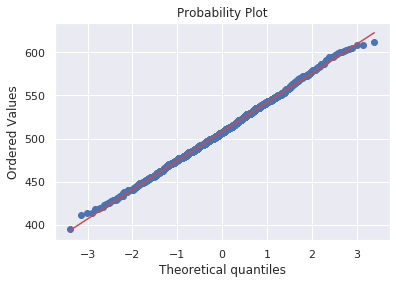

In [10]:
stats.probplot(Xchallenge[col1], dist="norm", plot=pylab)

In [11]:
from scipy.stats import shapiro

stat, p = shapiro(Xchallenge[col1])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('la variable semble être Gaussien (on ne rejette pas H0)')
else:
    print('La variable ne semble pas être Gaussien (On rejette H0)')

Statistics=0.999, p=0.182
la variable semble être Gaussien (on ne rejette pas H0)


In [12]:
n = 0
n_test = 0
n_train = 0

for col in list(Xchallenge.columns):
    stat, p = shapiro(Xchallenge[col])
    stat_train, p_train = shapiro(Xtrainchallenge[col])
    stat_test, p_test = shapiro(Xtestchallenge[col])
   
    if p > 0.05:
        n += 1
        
    if p_train > 0.05:
        n_train += 1
        
    if p_test > 0.05:
        n_test += 1
        
print("Nombre de variables gaussiennes dans les données Xchallenge(Train+Test) par le test de Shapiro: ",n)
print("Nombre de variables gaussiennes dans les données Xtrainchallenge par le test de Shapiro: \t",n_train)
print("Nombre de variables gaussiennes dans les données Xtestchallenge par le test de Shapiro: \t",n_test)

Nombre de variables gaussiennes dans les données Xchallenge(Train+Test) par le test de Shapiro:  290
Nombre de variables gaussiennes dans les données Xtrainchallenge par le test de Shapiro: 	 349
Nombre de variables gaussiennes dans les données Xtestchallenge par le test de Shapiro: 	 341


## 2. Feature engineering

In [13]:
Xtrainchallenge_init = Xtrainchallenge.copy() # on garde un jeu de données initiales
Xtestchallenge_init = Xtestchallenge.copy() # on garde un jeu de données initiales

#### a. Standardization

https://sebastianraschka.com/faq/docs/scale-training-test.html

In [14]:
scaler = StandardScaler()
scaler.fit(Xtrainchallenge)

Xtrainchallenge_std = scaler.transform(Xtrainchallenge)
Xtestchallenge_std = scaler.transform(Xtestchallenge)

Xtrainchallenge = pd.DataFrame(Xtrainchallenge_std, columns=Xchallenge.columns) 
Xtestchallenge = pd.DataFrame(Xtestchallenge_std, columns=Xchallenge.columns) 

In [15]:
Xtrainchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,0.452234,-0.203686,0.716163,-0.479173,-1.236679,-1.242866,0.278893,-0.383484,-0.769411,-0.815244,-0.798638,0.286586,-0.686439,0.619567,-0.537261,0.571619,-2.413988,-2.412337,-0.203611,0.494294,2.364339,-0.543314,-1.827554,0.489999,-0.496128,-0.308910,1.096101,0.803380,-1.468911,-0.459720,0.168990,0.149418,0.176861,-0.760943,0.922425,0.714561,0.005457,0.277255,-1.440292,-2.629697,-0.720635,1.082626,0.362700,1.215551,0.545268,0.375098,0.271728,0.648641,-1.024724,-0.567824,0.765661,0.732496,-1.607063,0.582327,-1.294649,-1.256338,0.647812,-0.006088,-0.734822,-0.936646,1.442722,-0.209793,-0.909388,0.038354,1.617126,-0.807589,1.508149,-0.440171,-1.334373,-0.335929,0.709977,-0.300300,0.351428,-0.843022,2.046952,-0.490486,0.724306,-0.950104,0.200957,0.846468,-1.013291,-1.331268,0.318033,0.819064,-0.393411,0.242656,-0.053801,-1.066571,-0.975247,-1.130435,-0.145395,-1.150075,0.073947,0.753649,-0.737731,0.080651,0.410978,2.520961,-0.669430,0.596749,-0.089167,-0.052062,0.275746,-1.096801,-0.385397,-2.308445,0.978625,-0.572254,-2.046122,0.089478,0.232153,0.066773,-1.046086,1.911533,0.337871,0.168791,-0.411417,-0.557596,1.326447,0.278304,-0.923238,0.282321,-0.147752,0.295001,-0.662474,1.043148,0.758890,-0.474580,-2.285950,-0.068323,-0.298651,0.764061,-0.543112,0.329817,0.742561,0.564946,0.997603,0.651311,0.318032,-1.347851,-0.714157,0.578269,2.226158,0.568172,0.242747,-0.607138,-0.176051,0.200354,-0.390900,0.371129,0.340881,-0.771683,0.095958,0.737506,0.791364,-0.188680,-1.096501,0.081974,1.615136,-3.160443,1.855034,-0.152768,0.466674,1.033240,0.522354,-0.592247,0.609381,0.823167,-0.689822,0.

In [16]:
Xtestchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,-0.019334,1.915869,-0.958828,0.190843,1.846937,-0.077224,0.229891,0.355406,-0.900008,0.051883,0.277730,1.235780,-1.187468,0.113441,-1.592147,2.031809,-0.194025,-0.974925,0.717136,0.080226,-0.468996,-1.253587,1.114183,0.181888,-0.154881,-1.385859,-0.349819,-0.052646,-0.792835,-0.185669,-1.273127,1.403881,0.528312,1.142513,-0.615504,0.546576,1.737795,1.421847,-1.021237,-0.107811,-0.144818,-0.358744,1.347812,0.295562,0.754049,-1.453611,-0.139649,0.585644,0.317144,-1.079519,1.968864,-0.650198,-0.424195,-0.418235,0.957833,-1.061535,-0.466182,0.480949,1.886194,-0.553128,-0.047587,0.839174,-0.080143,0.642356,-0.527633,0.920971,-0.006083,-0.632029,0.564550,0.115589,0.136895,0.390045,0.436789,-0.194107,-0.639729,0.511041,-0.480361,-0.484804,-1.352431,0.192747,0.812020,0.290694,-2.536240,-1.168376,0.159132,0.862388,-0.616181,-0.225505,0.618815,1.102853,-0.145395,-1.488695,-1.102926,1.799221,0.354844,1.387849,1.217873,-1.299076,0.357855,0.511649,-1.581025,-0.284479,0.117906,-0.013148,-0.105169,-0.262287,-0.385749,2.106095,1.146004,0.380937,0.042227,0.315275,0.621903,-0.758827,1.388081,0.815951,-1.307208,0.474107,-0.351043,-0.691704,0.417379,0.239899,0.519086,0.546022,-1.967934,-0.217731,1.389264,-0.019922,-0.240281,-1.279450,-0.845097,0.239359,-0.730295,-0.667362,-2.294826,0.188503,0.130079,-0.826856,0.015720,-0.480766,0.167175,0.501142,0.571605,-0.450260,-1.074143,0.342009,-0.692331,0.306165,0.970444,0.395807,-1.422127,0.444715,-1.627844,-0.713338,-0.651414,0.428426,0.913320,-1.252297,-0.790072,-1.144354,-0.087410,0.112915,0.551048,-0.463486,-0.117303,0.155382,-0.701116,0.823167,-1.512998

##### Remarque: 

In [17]:
Ytrainchallenge = Ytrainchallenge.reset_index(drop=True)

#### b. RFECV

In [18]:
from sklearn.feature_selection import RFECV

In [19]:
X = Xtrainchallenge # on fait le choix de travailler avec X avant de réstituer ces informations à Xtrainchallenge
y = Ytrainchallenge

##### RFECV / Séléction récursive de variables avec cross-validation et Decision Tree 

In [20]:
# Features_opt = {}

# for i in range(500):
#     print(i+1,":")
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
#     MAX_DEPTH = choice(np.arange(7, 12, dtype=int))
#     MAX_FEATURES =  choice([0.95])
    
#     rfecv = RFECV(estimator=DecisionTreeClassifier(max_depth=MAX_DEPTH, max_features=MAX_FEATURES),step=1, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=1)
#     rfecv.fit(X_train, y_train)
    
#     print("score: ", round(accuracy_score(y_test, rfecv.predict(X_test)),4))
    
#     Features_opt[i+1] = list(X_train.columns[rfecv.support_])

In [21]:
# ### Example of Plot number of features VS. cross-validation scores
# plt.figure(figsize=(10,6))
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [22]:
# Features_opt_bis = {}

# liste = []
# for col in Features_opt.values():
#     liste.extend(col)
    
# Features_opt_bis = dict(Counter(liste))
# Features_opt_bis

# # On met le résultat dans un dataFrame
# df_Features_opt = pd.DataFrame([Features_opt_bis]).rename(index={0: 'Instance'})
# df_Features_opt = df_Features_opt.sort_values(axis=1, by = 'Instance', ascending = False)

# ## On sauvegarde notre résultat
# df_Features_opt.to_csv(r'/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/data_challenge/df_Features_opt.csv')

#### c. Data Analyse

In [23]:
df_Features_opt = pd.read_csv(path_Home + "/df_Features_opt.csv",  sep=',')

In [24]:
print("Varaibles les plus importantes:")
df_Features_opt

Varaibles les plus importantes:


,V379,V476,V443,V339,V154,V452,V434,V454,V129,V319,V242,V473,V337,V456,V414,V106,V428,V404,V416,V431,V406,V418,V439,V432,V437,V398,V410,V407,V387,V397,V411,V399,V402,V427,V423,V413,V412,V390,V435,V403,V419,V422,V420,V415,V401,V400,V394,V389,V436,V408,V396,V392,V386,V417,V438,V405,V409,V391,V388,V382,V366,V370,V421,V441,V440,V159,V445,V395,V442,V361,V135,V433,V384,V429,V426,V425,V383,V424,V145,V393,V385,V450,V449,V430,V447,V369,V368,V459,V180,V380,V453,V177,V357,V162,V444,V448,V475,V371,V151,V378,V377,V362,V457,V458,V381,V375,V367,V446,V160,V451,V136,V372,V138,V158,V176,V165,V161,V157,V170,V152,V192,V364,V365,V132,V182,V374,V164,V173,V163,V172,V214,V137,V183,V181,V156,V171,V178,V188,V202,V194,V175,V169,V185,V133,V360,V376,V140,V373,V155,V148,V174,V149,V166,V146,V455,V142,V179,V131,V134,V167,V139,V184,V187,V363,V186,V201,V153,V147,V359,V208,V358,V205,V144,V203,V168,V143,V141,V198,V197,V196,V193,V191,V190,V189,V150,V356,V461,V210,V206,V207,V199,V200,V204,V130,V209,V224,V213,V211,V212,V216,V353,V195,V352,V215,V355,V470,V217,V462,V460,V219,V227,V225,V465,V474,V463,V354,V464,V218,V222,V223,V349,V236,V466,V471,V220,V226,V221,V467,V351,V468,V469,V472,V229,V233,V228,V348,V350,V230,V234,V232,V239,V347,V237,V240,V231,V243,V238,V345,V335,V346,V235,V344,V241,V112,V343,V127,V115,V110,V111,V245,V114,V119,V117,V116,V125,V126,V342,V338,V341,V124,V128,V244,V113,V123,V121,V120,V118,V108,V122,V246,V477,V109,V107,V480,V482,V340,V247,V481,V248,V478,V479,V250,V334,V336,V282,V326,V332,V327,V333,V249,V328,V484,V312,V485,V105,V331,V330,V329,V483,V313,V315,V104,V103,V102,V101,V100,V320,V95,V96,V486,V325,V289,V254,V99,V98,V97,V488,V487,V94,V291,V297,V310,V324,V255,V311,V489,V304,V293,V299,V49,V316,V318,V256,V321,V314,V323,V309,V307,V490,V306,V93,V90,V290,V91,V92,V253,V257,V85,V89,V322,V317,V492,V287,V300,V308,V261,V251,V491,V296,V302,V303,V258,V295,V305,V88,V86,V87,V298,V252,V84,V294,V301,V74,V75,V494,V77,V286,V285,V83,V292,V82,V493,V288,V76,V79,V73,V78,V72,V80,V81,V65,V70,V71,V69,V68,V67,V259,V269,V260,V281,V283,V63,V66,V64,V266,V495,V57,V284,V263,V62,V61,V60,V58,V59,V56,V55,V54,V53,V52,V270,V51,V271,V272,V50,V279,V280,V267,V264,V265,V496,V278,V262,V268,V497,V273,V48,V275,V47,V499,V274,V498,V46,V45,V44,V276,V277,V29,V40,V41,V42,V43,V35,V32,V36,V30,V31,V500,V34,V39,V38,V37,V33,V28,V27,V26,V25,V20,V23,V22,V21,V24,V19,V18,V17,V16,V15,V11,V14,V13,V12,V10,V8,V9,V4,V5,V6,V7
Instance,473,340,301,283,252,244,231,209,203,197,145,111,86,85,84,82,78,72,71,71,70,70,69,68,68,68,68,67,67,66,66,66,66,66,66,65,64,64,64,64,64,63,63,63,63,63,63,63,62,62,62,62,62,62,62,61,61,61,61,61,61,61,61,61,61,61,60,60,60,60,60,60,60,60,60,60,60,60,60,60,59,59,59,59,58,58,58,58,58,58,58,58,58,58,58,58,58,58,57,57,57,57,57,57,57,57,57,57,57,56,56,56,56,56,56,56,56,56,56,56,56,56,56,55,55,55,55,55,55,55,55,55,55,55,55,54,54,54,54,54,54,54,54,54,54,54,54,54,54,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,51,51,51,51,51,51,51,51,51,51,50,50,50,50,50,50,50,50,50,49,49,49,49,49,49,49,48,48,48,48,48,48,48,48,48,47,47,47,47,47,46,46,46,46,46,46,46,45,45,45,45,45,44,44,44,43,43,43,43,43,42,42,42,42,42,41,41,41,40,40,40,40,40,39,39,39,39,39,39,38,38,38,38,38,38,38,38,38,38,38,38,38,37,37,37,37,36,36,36,36,36,36,35,35,34,34,34,34,34,33,33,32,32,31,31,31,31,31,30,30,30,30,30,30,29,29,29,29,29,29,29,29,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,27,27,27,27,27,27,27,27,27,27,27,26,26,26,26,26,26,26,26,26,26,26,25,25,25,25,25,25,25,25,25,25,25,24,24,24,24,24,24,24,24,24,24,24,24,23,23,23,23,22,22,22,22,22,22,22,22,22,22,21,21,21,21,21,21,21,21,21,21,21,20,20,20,20,20,20,19,19,19,19,19,19,19,18,18,18,18,18,18,18,18,18,18,18,18,18,17,17,17,17,17,17,17,17,16,16,16,15,15,14,14,13,13,13,13,12,12,12,12,12,12,12,12,11,11,11,11,11,10,10,10,10,10,10,10,10,10,10,10,7,7,7,6,6,6,6,6,6,6,6,6,5,4,3,3,3,3,3,2,2,1,1,1,1


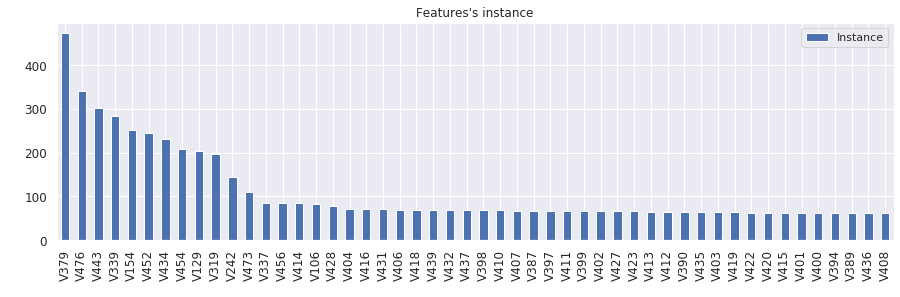

In [25]:
ax = df_Features_opt[df_Features_opt.columns[0:50]].T.plot(kind='bar', title ="Features's instance", figsize=(15, 4), legend=True, fontsize=12)
ax.set_xlabel(" ", fontsize=5)
ax.set_ylabel(" ", fontsize=12)
plt.show()

##### Corrélation

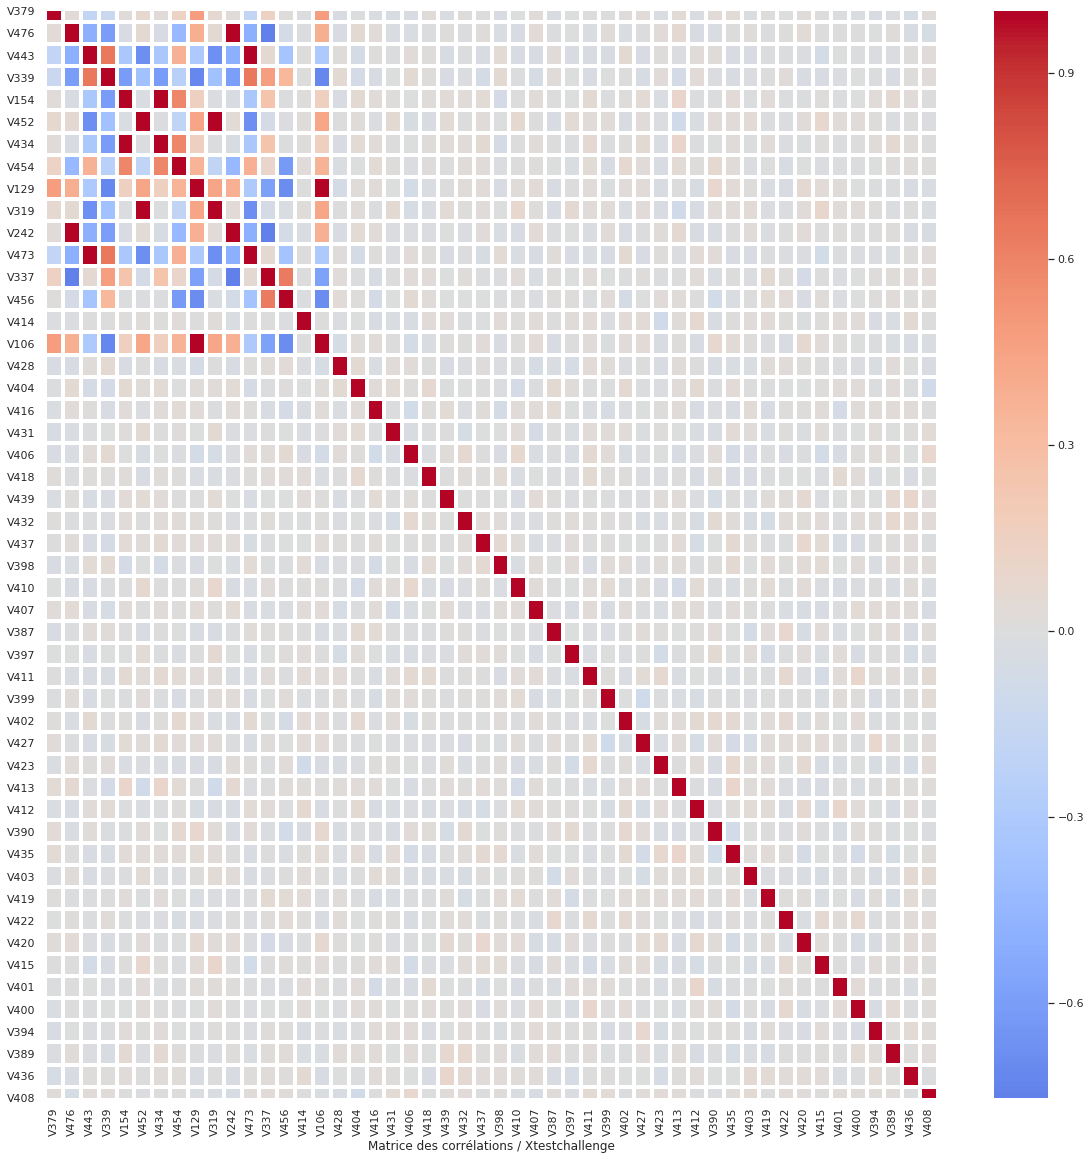

In [26]:
plt.subplots(figsize=(20, 20))
sns.heatmap(X[df_Features_opt.columns[0:50]].corr(),cmap='coolwarm', annot_kws={"size": 9}, annot=False, fmt=".2f",vmax=1, center=0, linewidths=3)
plt.xlabel("Matrice des corrélations / Xtestchallenge")
plt.show()

In [27]:
DT_Selected_features = df_Features_opt.columns[:16] # 16 variables corrélées

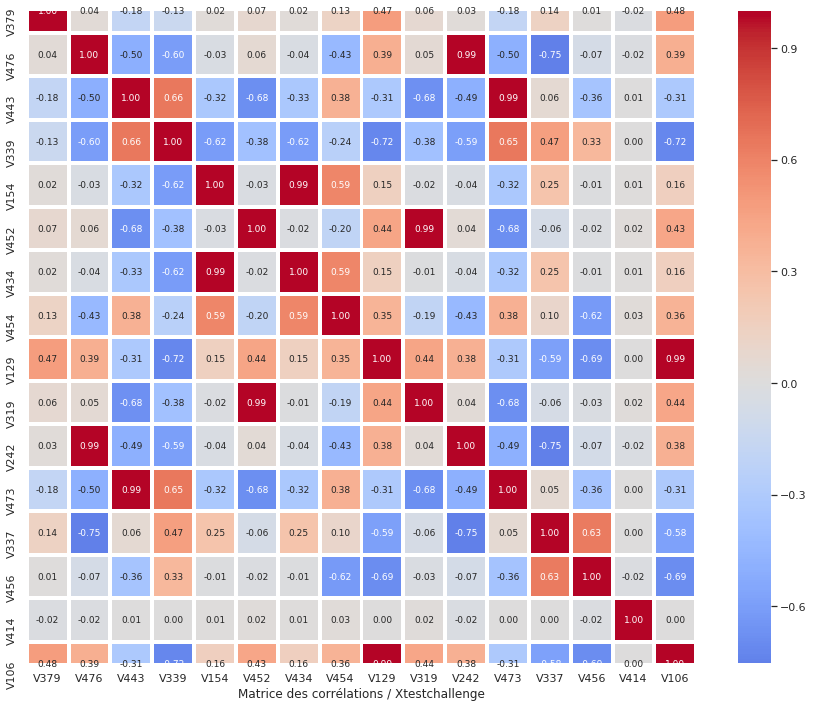

In [28]:
plt.subplots(figsize=(15, 12))
sns.heatmap(X[DT_Selected_features].corr(),cmap='coolwarm', annot_kws={"size": 9}, annot=True, fmt=".2f",vmax=1, center=0, linewidths=3)
plt.xlabel("Matrice des corrélations / Xtestchallenge")
plt.show()

##### Clustermap ?????

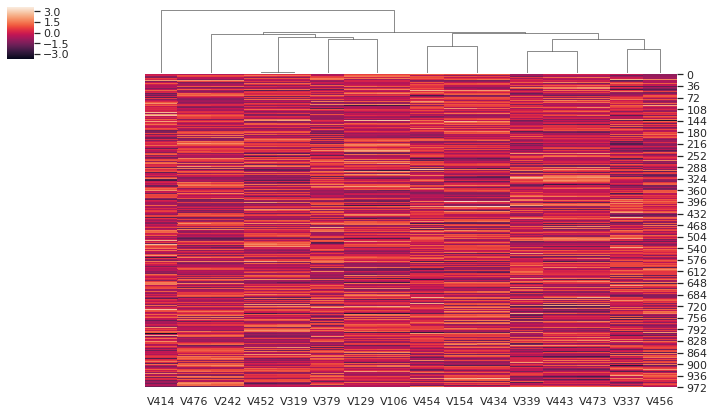

In [29]:
sns.clustermap(X[DT_Selected_features], method="single", row_cluster=False, metric="correlation", figsize=(12, 7))

In [30]:
Deleted_features = ["V434", "V319", "V242","V106", "V473", "V414"]
print("Variables à supprimer:",Deleted_features)

Variables à supprimer: ['V434', 'V319', 'V242', 'V106', 'V473', 'V414']


In [31]:
Selected_features = [col for col in DT_Selected_features if col not in Deleted_features]

##### Boxplot 

,V379,V476,V443,V339,V154,V452,V454,V129,V337,V456
Instance,473,340,301,283,252,244,209,203,86,85


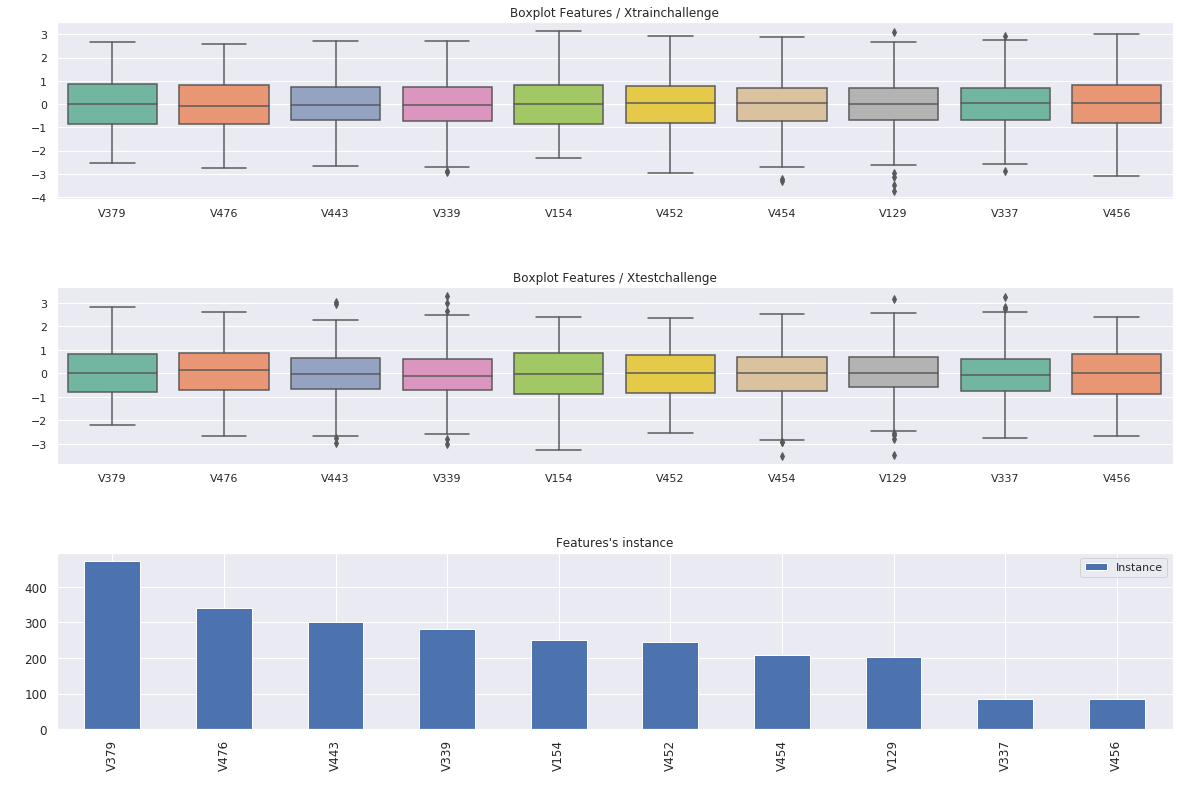

In [32]:
fig = plt.figure(figsize=(20, 13))

plt.gcf().subplots_adjust(hspace = 0.5)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.set_title('Boxplot Features / Xtrainchallenge')
ax2.set_title('Boxplot Features / Xtestchallenge')
ax3.set_xlabel(" ", fontsize=5)
ax3.set_ylabel(" ", fontsize=12)

sns.boxplot(data=Xtrainchallenge[Selected_features], orient="v", palette="Set2", ax=ax1)
sns.boxplot(data=Xtestchallenge[Selected_features], orient="v", palette="Set2", ax=ax2)
df_Features_opt[Selected_features].T.plot(kind='bar', title ="Features's instance", legend=True, fontsize=12,ax=ax3)

df_Features_opt[Selected_features]

In [33]:
print("Variables finales:",Selected_features)

Variables finales: ['V379', 'V476', 'V443', 'V339', 'V154', 'V452', 'V454', 'V129', 'V337', 'V456']


##### Visualizing the selected features

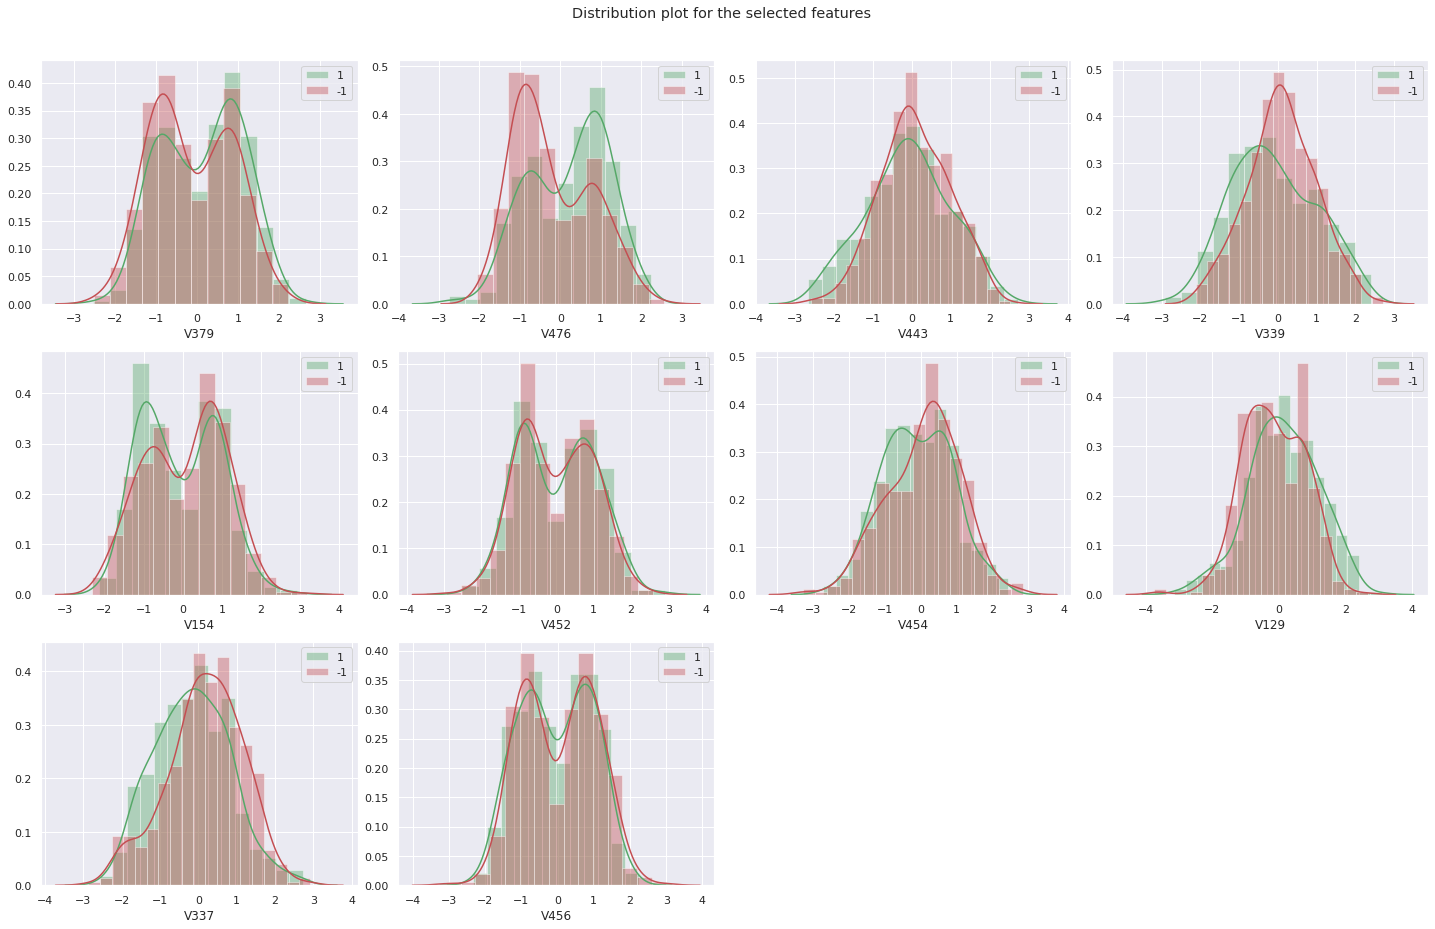

In [34]:
data = pd.concat([Xtrainchallenge, y], axis=1)

fig = plt.figure(figsize = (20, 25))
j = 0
for i in Selected_features:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][data['x']==1], color='g', label = '1')
    sns.distplot(data[i][data['x']==-1], color='r', label = '-1')
    plt.legend(loc='best')
fig.suptitle('Distribution plot for the selected features')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

##### Normalité / Test de shapiro

In [35]:
for col in Selected_features:
    stat, p = shapiro(Xtrainchallenge[col])
    print(col,":")
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print("On ne rejette pas H0: la variable",col,"semble être Gaussien")
    else:
        print("On rejette H0: la variable",col,"ne semble pas être Gaussien")
    print("")

V379 :
Statistics=0.972, p=0.000
On rejette H0: la variable V379 ne semble pas être Gaussien

V476 :
Statistics=0.970, p=0.000
On rejette H0: la variable V476 ne semble pas être Gaussien

V443 :
Statistics=0.996, p=0.006
On rejette H0: la variable V443 ne semble pas être Gaussien

V339 :
Statistics=0.996, p=0.006
On rejette H0: la variable V339 ne semble pas être Gaussien

V154 :
Statistics=0.973, p=0.000
On rejette H0: la variable V154 ne semble pas être Gaussien

V452 :
Statistics=0.974, p=0.000
On rejette H0: la variable V452 ne semble pas être Gaussien

V454 :
Statistics=0.996, p=0.009
On rejette H0: la variable V454 ne semble pas être Gaussien

V129 :
Statistics=0.996, p=0.013
On rejette H0: la variable V129 ne semble pas être Gaussien

V337 :
Statistics=0.996, p=0.011
On rejette H0: la variable V337 ne semble pas être Gaussien

V456 :
Statistics=0.971, p=0.000
On rejette H0: la variable V456 ne semble pas être Gaussien



##### Outliers

In [36]:
# fig = plt.figure(figsize=(20, 12))

# plt.gcf().subplots_adjust(hspace = 0.3)
# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)

# ax1.set_title('Boxplot Features / Xtrainchallenge')
# ax2.set_title('Boxplot Features / Xtestchallenge')

# sns.boxplot(data=Xtrainchallenge[Selected_features], orient="v", palette="Set2", ax=ax1)
# sns.swarmplot(data=Xtrainchallenge[Selected_features], color=".6",ax=ax1)

# sns.boxplot(data=Xtestchallenge[Selected_features], orient="v", palette="Set2", ax=ax2)
# sns.swarmplot(data=Xtestchallenge[Selected_features], color=".6",ax=ax2)

In [37]:
X_test_outliers = Xtestchallenge[Selected_features] # il est plus sûr de ne pas travailler directement avec Xtestchallenge

z_train = np.abs(stats.zscore(Xtrainchallenge[Selected_features]))
z_test = np.abs(stats.zscore(X_test_outliers))

print("Xtrainchallenge avec des outliers:",list(set(np.where(z_train > 3)[0])))
print("Xtestchallenge avec des outliers:",list(set(np.where(z_test > 3)[0])))

Xtrainchallenge avec des outliers: [577, 453, 840, 329, 395, 396, 145, 146, 466]
Xtestchallenge avec des outliers: [812, 877, 752, 625, 722, 950, 444, 95]


In [38]:
# print("Xtrainchallenge[Selected_features] avec outliers:")
# print ("Lignes: " ,Xtrainchallenge[Selected_features].shape[0])
# print ("Colonnes: " ,Xtrainchallenge[Selected_features].shape[1])

# Xtrainchallenge = Xtrainchallenge[(z_train < 3).all(axis=1)] # On supprime les outliers dans Xtrainchallenge 
# Ytrainchallenge = Ytrainchallenge[(z_train < 3).all(axis=1)] # On supprime les labels des outliers dans Ytrainchallenge 

# print("\nXtrainchallenge[Selected_features] sans outliers:")
# print ("Lignes: " ,Xtrainchallenge[Selected_features].shape[0])
# print ("Colonnes: " ,Xtrainchallenge[Selected_features].shape[1])

In [39]:
# df = Xtrainchallenge[Selected_features]

# print("Xtrainchallenge Outliers:\n")
# print(df[df > df.mean() + 3 * df.std()].sum())

#### e. Premier essai avec Decision Tree

In [40]:
# Selected_features

In [41]:
# X = Xtrainchallenge[Selected_features]
# y = Ytrainchallenge

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# #On vérifie l'équilibre des classes
# print("Total_Train:",y_train.count().x,"/ difference:",y_train.sum().x)
# print("Total_Test:",y_test.count().x,"/ difference:",y_test.sum().x)

In [42]:
# parameters = {
#     "criterion": ["gini", "entropy"],
#     "max_depth":np.arange(5, 13, dtype=int),
#     "min_samples_split": [2, 0.001, 0.005, 0.01, 0.02],
#     "min_samples_leaf": [1, 0.0025, 0.005, 0.01, 0.02],
#     "min_impurity_decrease" : [0.001,0.0012,0.0015,0.0017,0.002]
# }

# clf_DT = GridSearchCV(DecisionTreeClassifier(), parameters, scoring ="accuracy", cv=5, n_jobs=-1,verbose=8)

# clf_DT.fit(X_train, y_train)

In [43]:
# print("Train: ",round(clf_DT.score(X_train, y_train), 2))
# print("Test: ",round(clf_DT.score(X_test, y_test), 2))
# print("\n")
# print(clf_DT.best_params_)

In [44]:
# clf_DT.best_estimator_.feature_importances_
# Importance = sorted(zip(map(lambda x: round(x, 4), clf_DT.best_estimator_.feature_importances_),
#                Xtrainchallenge[Selected_features].columns), reverse=True)

# print("Features sorted by their score:")
# for i,j in (Importance):
#     print(j,": ", i)

In [45]:
# y_DT = clf_DT.predict(X_test)
# print(classification_report(y_test, y_DT))

In [46]:
# print(confusion_matrix(y_test, y_DT))

In [47]:
# y_pred = y_DT
# y_pred_proba = clf_DT.predict_proba(X_test)[:, 1]
# [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
# # print('Train/Test split results:')
# # print("accuracy is %2.3f" % accuracy_score(y_test, y_pred))
# # print(logreg.__class__.__name__+"log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
# # print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

# plt.figure()
# plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
# plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
# plt.ylabel('True Positive Rate (recall)', fontsize=14)
# plt.title('Receiver operating characteristic (ROC) curve')
# plt.legend(loc="lower right")
# plt.show()

# print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
#       "and a specificity of %.3f" % (1-fpr[idx]) + 
#       ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

## 3. XGBOOST

https://xgboost.readthedocs.io/en/latest/parameter.html

In [48]:
## XGBoost_eval_metric = {"error", "auc", "aucpr", "mlogloss"} et {"Score_Malick"}

# On peut crée soit même son métrique:
def Score_Malick(y_true, y_pred):
    
    """ XGBoost_eval_metric ne dispose pas du métrique balanced_accuracy, on le crée (Score_Malick) """
    
    prec = balanced_accuracy(y_true, np.round(y_pred))
    
    return 'Score_Malick', prec

###### Comment surveiller les performances d'entraînement avec XGBoost afin d'éviter un surajustement ?

#### a. XGBoost avec paramétres simples

In [49]:
# print(Selected_features)

In [50]:
# X = Xtrainchallenge[Selected_features]
# y = Ytrainchallenge

# XX, X_test, yy, y_test = train_test_split(X, y, test_size=0.20)

# #On vérifie l'équilibre des classes
# print("Train-Validation:",yy.count().x,"/ difference:",yy.sum().x)
# print("Test:",y_test.count().x,"/ difference:",y_test.sum().x)

In [51]:
# X_train, X_val, y_train, y_val = train_test_split(XX, yy, test_size=0.125)

# #On vérifie l'équilibre des classes
# print("Train:",y_train.count().x,"/ difference:",y_train.sum().x)
# print("Validation:",y_val.count().x,"/ difference:",y_val.sum().x)

In [52]:
# print("Train:",y_train.count().x,"\t/ difference:",y_train.sum().x)
# print("Validation:",y_val.count().x,"/ difference:",y_val.sum().x)
# print("Test:",y_test.count().x,"\t/ difference:",y_test.sum().x)

In [53]:
# myXGBoost = XGBClassifier(n_jobs=-1, eval_metric ='error', objective='binary:logistic',
#                           booster='gbtree', colsample_bytree=1, subsample=1)

In [54]:
# parameters = {"n_estimators" : np.arange(20, 150, 2, dtype=int),
#               "learning_rate":  np.arange(0.005, 0.105, 0.01),
#               "max_depth":np.arange(5, 13, dtype=int),
#               "min_child_weight": np.arange(1, 4, 1, dtype=int),
#               "gamma" : np.arange(0, 1, 0.05),
#               "reg_lambda" : np.arange(1, 4, 1)}

In [55]:
# clf_XGB = GridSearchCV(myXGBoost, parameters, cv=10, n_jobs=-1,verbose=5)

# eval_set = [(X_train, y_train), (X_val, y_val)]

# clf_XGB.fit(X_train, y_train, early_stopping_rounds=25, eval_metric='error', eval_set=eval_set, verbose=True)

In [56]:
# results= clf_XGB.best_estimator_.evals_result()
# # print(results)

In [57]:
# # Récupérer les mesures de performance
# epochs = len(results['validation_0']['error'])
# x_axis = range(0, epochs)

# # plot erreur de classification Train / Test pendant la phase d'entraînement
# fig, ax = plt.subplots(figsize=(8, 4))
# ax.plot(x_axis, results['validation_0']['error'], label='Train')
# ax.plot(x_axis, results['validation_1']['error'], label='Test')
# ax.legend()
# plt.ylabel('Classification Error')
# plt.title('XGBoost Classification Error')
# plt.grid()
# plt.show()

In [58]:
# print("Train: ",round(clf_XGB.score(X_train, y_train),2))
# print("Validation: ",round(clf_XGB.score(X_val, y_val),2))
# print("Test: ",round(clf_XGB.score(X_test, y_test),2))

In [59]:
# y_myXGB = clf_XGB.predict(X_test)
# print(classification_report(y_test, y_myXGB))

In [60]:
# print(confusion_matrix(y_test, y_myXGB))

In [61]:
# ## plot feature importance
# xgboost.plot_importance(clf_XGB.best_estimator_,max_num_features=10)
# plt.show()

In [62]:
# best = clf_XGB.best_params_
# print(clf_XGB.best_params_)

In [63]:
# XGBoost_Version_9 = XGBClassifier(n_jobs=-1, eval_metric ='error', objective='binary:logistic',
#                                    booster='gbtree', colsample_bytree=1, subsample=1,
#                                    gamma=best["gamma"],
#                                    learning_rate=best["learning_rate"],
#                                    max_depth=int(best["max_depth"]),
#                                    n_estimators=int(best["n_estimators"]))

# XGBoost_Version_9.fit(XX, yy) # données total de Train/validation

In [64]:
# print("#################")
# print("Train:\t",round(XGBoost_Version_9.score(XX, yy),2))
# print("Test:\t",round(XGBoost_Version_9.score(X_test, y_test),4))
# print("#################")

In [65]:
# ## On sauvegarde le modéle
# filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/clf_XGBOOST_Version_6'
# joblib.dump(clf_XGB, filename)

In [66]:
# ## On charge le modéle sauvegardé
# filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/clf_XGBOOST_Version_6'
# clf_XGB = joblib.load(filename)

##### Conclusion: 

In [67]:
#best = clf_XGB.best_params_
# print(best)

In [68]:
# XGBoost_Version_9 = XGBClassifier(n_jobs=-1, eval_metric ='error', objective='binary:logistic',
#                                    booster='gbtree', colsample_bytree=1, subsample=1,
#                                    gamma=best["gamma"],
#                                    learning_rate=best["learning_rate"],
#                                    max_depth=int(best["max_depth"]),
#                                    min_child_weight=int(best["min_child_weight"]),
#                                    n_estimators=int(best["n_estimators"]),
#                                    reg_lambda=best["reg_lambda"])

# XGBoost_Version_9.fit(Xtrainchallenge[Selected_features], Ytrainchallenge) # données total

In [69]:
# y_XGBoost_Version_9 = XGBoost_Version_9.predict(Xtestchallenge[Selected_features]) #données de Challenge

# path_XGBoost_Version_9 = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Challenges/WADE_XGBoost_Version_9.txt'

# np.savetxt(path_XGBoost_Version_9, np.transpose(y_XGBoost_Version_9),fmt='% 0d')

#### b. XGBoost tunning avec "hyperopt" 

https://medium.com/district-data-labs/parameter-tuning-with-hyperopt-faa86acdfdce

In [70]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

##### Appliquons Hyperopt à XGBOOST 

In [71]:
# print(Selected_features)

# X = Xtrainchallenge[Selected_features]
# y = Ytrainchallenge

In [72]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# #On vérifie l'équilibre des classes
# print("Train:",y_train.count().x,"/ équilibre:",y_train.sum().x)
# print("Test:",y_test.count().x,"/ équilibre:",y_test.sum().x)

##### Create the objective function

In [73]:
# def objective(space):
#     # Instantiate the classifier
#     xgb = xgboost.XGBClassifier(n_jobs=-1, eval_metric='error', objective='binary:logistic',
#                                 booster='gbtree',reg_lambda=2, min_child_weight=1,  
#                                 n_estimators =int(space['n_estimators']),
#                                 max_depth = int(space['max_depth']),
#                                 learning_rate = space['learning_rate'],
#                                 eta =space['eta'],
#                                 colsample_bytree = space["colsample_bytree"],
#                                 subsample = space["subsample"],
# #                                  min_child_weight = int(space['min_child_weight']),
# #                                 reg_lambda = space['reg_lambda'],
#                                 gamma = space['gamma'])

#     cv=5
#     cv_precision = cross_val_score(xgb, X=X_train, y=y_train, cv=cv, scoring="balanced_accuracy", n_jobs=-1)
    
#     #### on minimise la moyenne armonique des erreurs de validation croisée
#     precision = statistics.harmonic_mean(cv_precision) 
#     error = 1 - precision 
#     return {'loss': error, 'status': STATUS_OK }

In [74]:
# sklearn.metrics.SCORERS.keys()

##### Create the Space for your classifier 

In [75]:
# space = {
#     "eta" : hp.uniform("eta", 0.02, 0.07),
#     "gamma" : hp.uniform("gamma", 0.1, 0.99),
# #      'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
# #     "reg_lambda" : hp.quniform("reg_lambda", 1, 2, 1), # régularisation L2 
#     "colsample_bytree" : hp.uniform("colsample_bytree", 0.7, 0.841),
#     "subsample" : hp.uniform("subsample", 0.5, 0.75),
#     "learning_rate":  hp.uniform("learning_rate", 0.005, 0.1),
#     "max_depth": hp.quniform("max_depth", 7, 10, 1),
#     'n_estimators' : hp.quniform('n_estimators', 50, 105, 1)}

##### Run Hyperopt 

In [76]:
# MAX_EVALS = 10000

# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=MAX_EVALS,
#             trials=trials)
# print('best:')
# best # les paramétres optimaux obtenus avec Hyperopt

In [77]:
# ### Erreur_test: 0.89
    
# best = {'colsample_bytree': 0.8325327718940322,
#  'eta': 0.026470536625807,
#  'gamma': 0.5003307582786118,
#  'learning_rate': 0.0874734331515754,
#  'max_depth': 10.0,
#  'n_estimators': 100.0,
#  'subsample': 0.6104274649873087}

##### On récupére les paramétres optimaux: 

##### Validation avec X_test:

In [78]:
# XGBOOST_Version_Hyperopt = XGBClassifier(n_jobs=-1, eval_metric='error', objective='binary:logistic',
#                                          booster='gbtree', reg_lambda=2, min_child_weight=1,
#                                          gamma=best["gamma"],
#                                          colsample_bytree = best["colsample_bytree"],
#                                          subsample = best["subsample"],
#                                          learning_rate=best["learning_rate"],
#                                          eta=best["eta"],
#                                          max_depth=int(best["max_depth"]),
#                                          n_estimators=int(best["n_estimators"]))  

# XGBOOST_Version_Hyperopt.fit(X_train, y_train) 

# print("#################")
# print("Train:\t",round(XGBOOST_Version_Hyperopt.score(X_train, y_train),2))
# print("Test:\t",round(XGBOOST_Version_Hyperopt.score(X_test, y_test),4))
# print("#################")

In [79]:
# ## plot feature importance
# xgboost.plot_importance(XGBOOST_Version_Hyperopt,max_num_features=20)
# plt.show()

##### Visualization 

In [80]:
# fig = plt.figure(figsize=(20, 10))

# plt.gcf().subplots_adjust(hspace = 0.8)
# ax1 = fig.add_subplot(231)
# ax2 = fig.add_subplot(232)
# ax3 = fig.add_subplot(233)
# ax4 = fig.add_subplot(234)


# #Visualization
# xs = [t['tid'] for t in trials.trials]
# ys = [t['misc']['vals']['colsample_bytree'] for t in trials.trials]
# ax1.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
# ax1.set_title('Titre', fontsize=18)
# ax1.set_xlabel('n_évaluation', fontsize=16)
# ax1.set_ylabel('colsample_bytree', fontsize=16)

# xs = [t['tid'] for t in trials.trials]
# ys = [t['misc']['vals']['subsample'] for t in trials.trials]
# ax2.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
# ax2.set_title('Titre', fontsize=18)
# ax2.set_xlabel('n_évaluation', fontsize=16)
# ax2.set_ylabel('subsample', fontsize=16)

# xs = [t['tid'] for t in trials.trials]
# ys = [t['misc']['vals']['gamma'] for t in trials.trials]
# ax3.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
# ax3.set_title('Titre', fontsize=18)
# ax3.set_xlabel('n_évaluation', fontsize=16)
# ax3.set_ylabel('gamma', fontsize=16)

# ys = [t['misc']['vals']['n_estimators'] for t in trials.trials]
# xs = [t['result']['loss'] for t in trials.trials]
# ax4.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
# ax4.set_xlim(0, 0.2)
# ax4.set_title('$Titre$', fontsize=18)
# ax4.set_ylabel('$n_estimators$', fontsize=16)
# ax4.set_xlabel('$erreur$', fontsize=16)

#### Challenge: 

In [81]:
# XGBOOST_Version_Hyperopt = XGBClassifier(n_jobs=-1, eval_metric='error', objective='binary:logistic',
#                                          booster='gbtree', reg_lambda=2, min_child_weight=1,
#                                          gamma=best["gamma"],
#                                          colsample_bytree = best["colsample_bytree"],
#                                          subsample = best["subsample"],
#                                          learning_rate=best["learning_rate"],
#                                          eta=best["eta"],
#                                          max_depth=int(best["max_depth"]),
#                                          n_estimators=int(best["n_estimators"]))

# XGBOOST_Version_Hyperopt.fit(Xtrainchallenge[Selected_features], Ytrainchallenge) # données total

In [82]:
# # On sauvegarde le modéle
# filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/XGBOOST_Version_Hyperopt'
# joblib.dump(XGBOOST_Version_Hyperopt, filename)

# # On charge le modéle sauvegardé
# filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/XGBOOST_Version_Hyperopt'
# XGBOOST_Version_Hyperopt = joblib.load(filename)

In [83]:
# y_XGBoost_Version_Hyperopt = XGBOOST_Version_Hyperopt.predict(Xtestchallenge[Selected_features]) #données de Challenge

# path_XGBoost_Version_Hyperopt = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Challenges/WADE_XGBoost_Version_Hyperopt_test_1.txt'

# np.savetxt(path_XGBoost_Version_Hyperopt, np.transpose(y_XGBoost_Version_Hyperopt),fmt='% 0d')

##### Conclusion: 

## 4. SVM rbf / Hyperopt 

In [540]:
print(Selected_features)

X = Xtrainchallenge[Selected_features]
y = Ytrainchallenge

['V379', 'V476', 'V443', 'V339', 'V154', 'V452', 'V454', 'V129', 'V337', 'V456']


In [547]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#On vérifie l'équilibre des classes
print("Train:",y_train.count().x,"/ équilibre:",y_train.sum().x)
print("Test:",y_test.count().x,"/ équilibre:",y_test.sum().x)

Train: 750 / équilibre: 2
Test: 250 / équilibre: 0


##### Create the objective function

In [548]:
def objective(space):
    # Instantiate the classifier
    svmRBF = SVC(kernel='rbf',probability=True, class_weight="balanced",
                 C =space['C'],
                 gamma = space["gamma"])

    cv=5
    cv_precision = cross_val_score(svmRBF, X=X_train, y=y_train, cv=cv, scoring="balanced_accuracy", n_jobs=-1)
    
    #### on minimise la moyenne armonique des erreurs de validation croisée
    precision = statistics.harmonic_mean(cv_precision) 
    error = 1 - precision
    
    return {'loss': error, 'status': STATUS_OK }

##### Create the Space for your classifier 

In [549]:
space = {"C" : hp.uniform("C", 0.001, 5),
         "gamma" : hp.uniform("gamma", 0.001, 5)}

##### Run Hyperopt 

In [550]:
MAX_EVALS = 200

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=MAX_EVALS,
            trials=trials)
print('best:')
best # les paramétres optimaux obtenus avec Hyperopt

100%|██████████| 200/200 [00:28<00:00,  7.04it/s, best loss: 0.10014031326742578]
best:


{'C': 4.888591919438881, 'gamma': 0.5765610596998408}

##### On récupére les paramétres optimaux: 

In [568]:
### Erreur_test: 0.925
best = {'C': 1.2866104312159486, ## augmentation du gamma conduit à un surajustement lorsque le classificateur essaie de s'adapter parfaitement aux données d'entraînement.
        'gamma': 0.5378570120721945}

In [569]:
svmRBF = SVC(kernel='rbf',probability=True, class_weight="balanced",
             C=best["C"],
             gamma=best["gamma"])

svmRBF.fit(X_train, y_train) 

print("#################")
print("Train:\t",round(svmRBF.score(X_train, y_train),4))
print("Test:\t",round(svmRBF.score(X_test, y_test),4))
print("#################")

#Sklearn's classification_report montre quelques-unes des principales mesures de classification pour chaque classe:
print(classification_report(y_test, svmRBF.predict(X_test)))

#################
Train:	 0.972
Test:	 0.912
#################
              precision    recall  f1-score   support

          -1       0.91      0.91      0.91       125
           1       0.91      0.91      0.91       125

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [570]:
svmRBF = SVC(kernel='rbf', probability=True, class_weight="balanced",
             C=best["C"],
             gamma=best["gamma"])

cv=LeaveOneOut()

cv_precision = cross_val_score(svmRBF, X=Xtrainchallenge[Selected_features], y=Ytrainchallenge, cv=5, scoring="balanced_accuracy", n_jobs=-1)
    
precision = cv_precision.mean()

print(round(precision,4))
print("")
print(sorted(cv_precision))

0.911

[0.895, 0.9, 0.9005940594059406, 0.925, 0.9345959595959596]


##### Visualization 

Text(0.5, 0, '$erreur$')

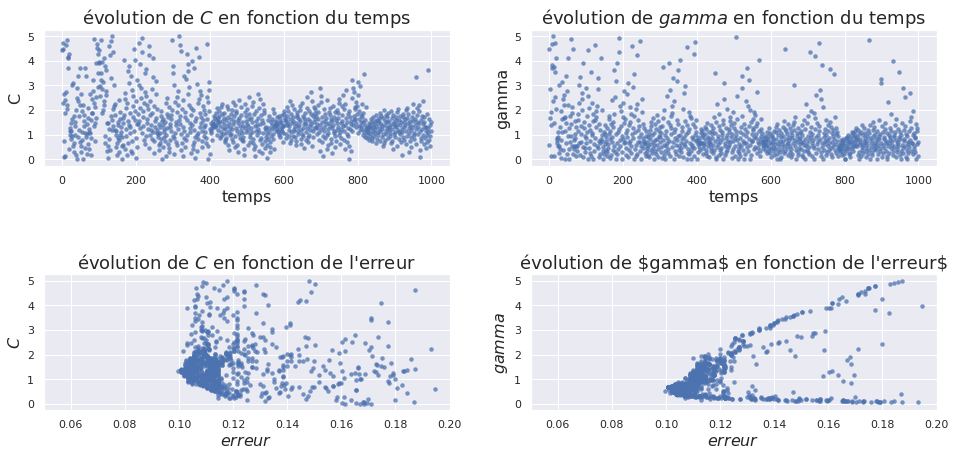

In [404]:
fig = plt.figure(figsize=(16, 7))

plt.gcf().subplots_adjust(hspace = 0.8)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['C'] for t in trials.trials]
ax1.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax1.set_title("évolution de $C$ en fonction du temps", fontsize=18)
ax1.set_xlabel('temps', fontsize=16)
ax1.set_ylabel('C', fontsize=16)

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['gamma'] for t in trials.trials]
ax2.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax2.set_title("évolution de $gamma$ en fonction du temps", fontsize=18)
ax2.set_xlabel('temps', fontsize=16)
ax2.set_ylabel('gamma', fontsize=16)

ys = [t['misc']['vals']['C'] for t in trials.trials]
xs = [t['result']['loss'] for t in trials.trials]
ax3.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax3.set_xlim(0.05, 0.2)
ax3.set_title("évolution de $C$ en fonction de l'erreur", fontsize=18)
ax3.set_ylabel('$C$', fontsize=16)
ax3.set_xlabel('$erreur$', fontsize=16)

ys = [t['misc']['vals']['gamma'] for t in trials.trials]
xs = [t['result']['loss'] for t in trials.trials]
ax4.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax4.set_xlim(0.05, 0.2)
ax4.set_title("évolution de $gamma$ en fonction de l'erreur$", fontsize=18)
ax4.set_ylabel('$gamma$', fontsize=16)
ax4.set_xlabel('$erreur$', fontsize=16)

##### Challenge: 

In [571]:
Xtrainchallenge[Selected_features].head()

,V379,V476,V443,V339,V154,V452,V454,V129,V337,V456
0,-1.309017,-1.094405,0.734273,1.274040,0.737506,-1.563614,-0.102783,-2.285950,1.632249,1.647333
1,0.518813,0.869344,-0.341788,0.259346,-0.997420,-0.392288,-1.516214,-0.495990,-0.149209,1.025742
2,-0.540303,-0.391171,0.068140,-0.724908,0.838963,0.353102,1.089799,0.697317,-0.186912,-1.020329
3,0.980041,1.572578,-0.505759,-1.272842,0.899838,-0.605256,0.550929,1.208735,-0.818434,-0.605935
4,-1.223604,1.015298,0.406331,0.066554,-0.551006,-0.605256,-0.500310,-0.325517,-0.940968,-0.489386


In [572]:
Ytrainchallenge.head()

,x
0,-1
1,-1
2,-1
3,1
4,1


In [575]:
svmRBF = SVC(kernel='rbf',probability=True, class_weight="balanced",
             C=best["C"],
             gamma=best["gamma"])

svmRBF.fit(Xtrainchallenge[Selected_features], Ytrainchallenge)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.2866104312159485, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5378570120721945,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [576]:
# ## On sauvegarde le modéle
# filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/svmRBF'
# joblib.dump(svmRBF, filename)

# ## On charge le modéle sauvegardé
# filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/svmRBF'
# svmRBF = joblib.load(filename)

['/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/svmRBF']

In [577]:
Xtestchallenge[Selected_features].head()

,V379,V476,V443,V339,V154,V452,V454,V129,V337,V456
0,0.382153,0.962224,0.180870,0.239052,-0.713338,-0.818224,-0.933173,-0.240281,-0.592217,0.365301
1,-0.130323,0.948955,-0.833701,-1.587398,1.315814,0.033649,0.595098,0.612081,-0.554514,-0.269240
2,0.997124,0.020155,1.226187,-0.461087,0.351967,-1.031193,1.460825,1.379207,-0.903265,-1.900916
3,-0.147405,-1.227091,0.314097,0.624636,-0.865525,1.311459,0.277077,0.526845,0.199542,-0.696583
4,-1.086944,1.041835,-1.991748,-1.343871,0.382404,1.950364,-1.039181,0.356373,-0.620494,0.326452


In [583]:
# y_svmRBF = svmRBF.predict(Xtestchallenge[Selected_features]) #données de Challenge

# path_svmRBF = "/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Challenges/WADE_svmRBF.txt"

# np.savetxt(path_svmRBF, np.transpose(y_svmRBF),fmt='% 0d')

In [585]:
y_svmRBF

array([-1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1,  1,  1,  1

##### conclusion:

## 5. Deep learning: A finir 

In [ ]:
X = Xtrainchallenge[Selected_features]
y = Ytrainchallenge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#On vérifie l'équilibre des classes
print("Train:",y_train.count().x,"/ difference:",y_train.sum().x)
print("Test:",y_test.count().x,"/ difference:",y_test.sum().x)

In [ ]:
image_index = 1

print(Ytrainchallenge.iloc[image_index].values)
plt.imshow(Xtrainchallenge[Selected_features].iloc[image_index].values.reshape(2, 5),cmap='Greys')